In [1]:
library(lindia)
library(tidyverse)
library(caret)
library(sjPlot) #plot estimate
library(webshot)
#library(leaps)
#library(MASS)
#library(lme4) #random effect
library(lmerTest) #like lmer but with p-value
library(effects)#calculate and display model estimates
library(ggplot2)
library(pbkrtest) #backward test for glmer
library(DHARMa) #simulaed residual for glmer
library(Cairo)
library(cowplot) #several plot together

#install.packages("webshot")
library(DHARMa)
library(lindia)
library(modEvA)
library(dplyr)
library(lme4) #random effect
library(broom)
library(ggpubr) 
library(rstatix)
library(WRS2) #robust ancova
library(emmeans)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.3
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Warning message:
"package 'sjPlot' was built under R version 4.0.4"
Learn more about sjPlot with 'browseVignettes("sjPlot")'.

Warning message:
"package 'webshot' was built under R version 4.0.5"
Loading required package: lme4

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack



Attaching package: 'lmerTes

In [2]:
#df_ = df[ which(df$PenID %in% c('pen3','pen4','pen5','pen10','pen11','pen12')), ]  

# Download data

In [3]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_/Adaptability'
df = read.csv(file.path(path_,'Adaptability_Stat.csv'), header = TRUE, sep = ";")
#df$'#of the first 3 days with 4 zone visited' = df$nbr_days_4zonevisited
#df$'mean % of time spent in lower perch' = df$mean_perc_duration_3_Zone
#df$'mean % of time spent in WG' = df$mean_percentage_time_outside_while_WG_open
df$Person_feather = as.factor(df$Person_feather)   
df$PenID = as.factor(df$PenID) 
print(dim(df))
summary(df)

[1] 79 23


 maxPododermatitis   maxhas_gap        severity       Feathers    
 Min.   :  0.00    Min.   :0.0000   Min.   : 6.0   Min.   :35.00  
 1st Qu.: 50.00    1st Qu.:0.0000   1st Qu.:24.0   1st Qu.:58.50  
 Median :100.00    Median :0.0000   Median :36.0   Median :66.33  
 Mean   : 93.18    Mean   :0.4937   Mean   :35.9   Mean   :65.66  
 3rd Qu.:125.00    3rd Qu.:1.0000   3rd Qu.:45.0   3rd Qu.:73.50  
 Max.   :265.00    Max.   :1.0000   Max.   :84.0   Max.   :86.67  
                                                                  
 Person_feather     weight     mean_perc_duration_5_Zone
 Sabine:45      Min.   :1518   Min.   : 2.745           
 Satar :34      1st Qu.:1802   1st Qu.:26.904           
                Median :1916   Median :39.953           
                Mean   :1912   Mean   :41.509           
                3rd Qu.:2020   3rd Qu.:54.788           
                Max.   :2304   Max.   :87.312           
                                                        
 mean_pe

# Linear mixed effect model

# check which variables to control for

Backward reduced random-effect table:

            Eliminated npar  logLik    AIC    LRT Df Pr(>Chisq)   
<none>                   11 -281.56 585.12                        
(1 | PenID)          0   10 -286.00 592.01 8.8804  1   0.002883 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Backward reduced fixed-effect table:
Degrees of freedom method: Satterthwaite 

               Eliminated  Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
RPen                    1   0.373   0.373     1 65.187  0.0038 0.9513
Treatment               2   2.790   2.790     1  6.055  0.0286 0.8713
CLASS                   3 201.389  50.347     4 67.009  0.5153 0.7247
Person_feather          4  62.878  62.878     1 70.750  0.6595 0.4195
InitWeight              5 206.710 206.710     1 72.160  2.1736 0.1447

Model found:
Feathers ~ (1 | PenID)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Feathers ~ (1 | PenID)
   Data: df

REML criterion at convergence: 591.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.39398 -0.64268 -0.04181  0.63809  2.21930 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept) 27.70    5.263   
 Residual             96.34    9.815   
Number of obs: 79, groups:  PenID, 8

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   65.775      2.169  6.948   30.32 1.22e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


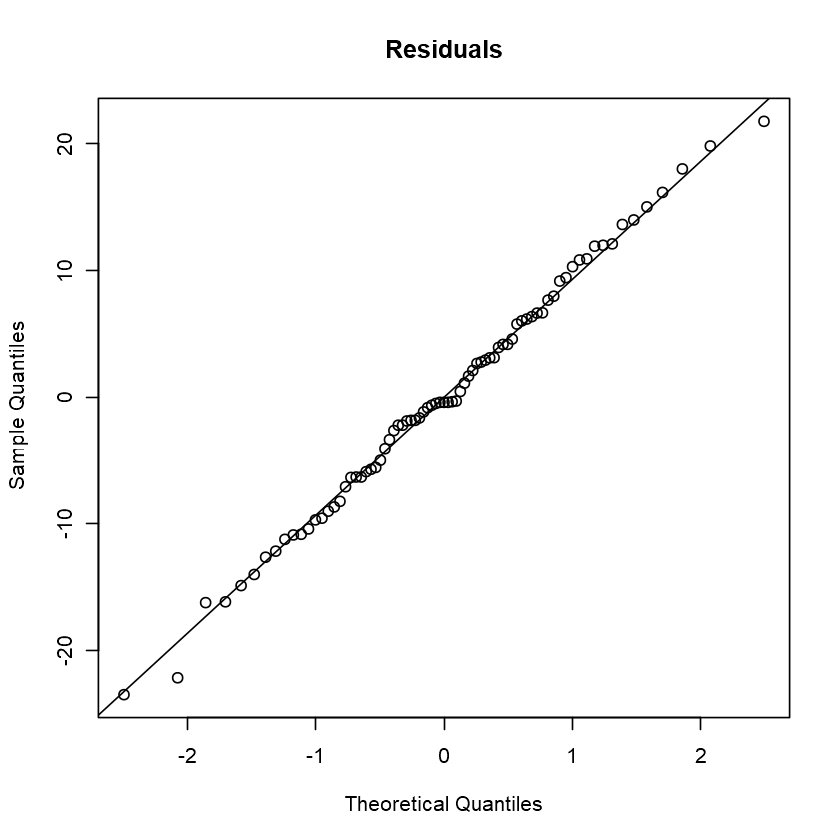

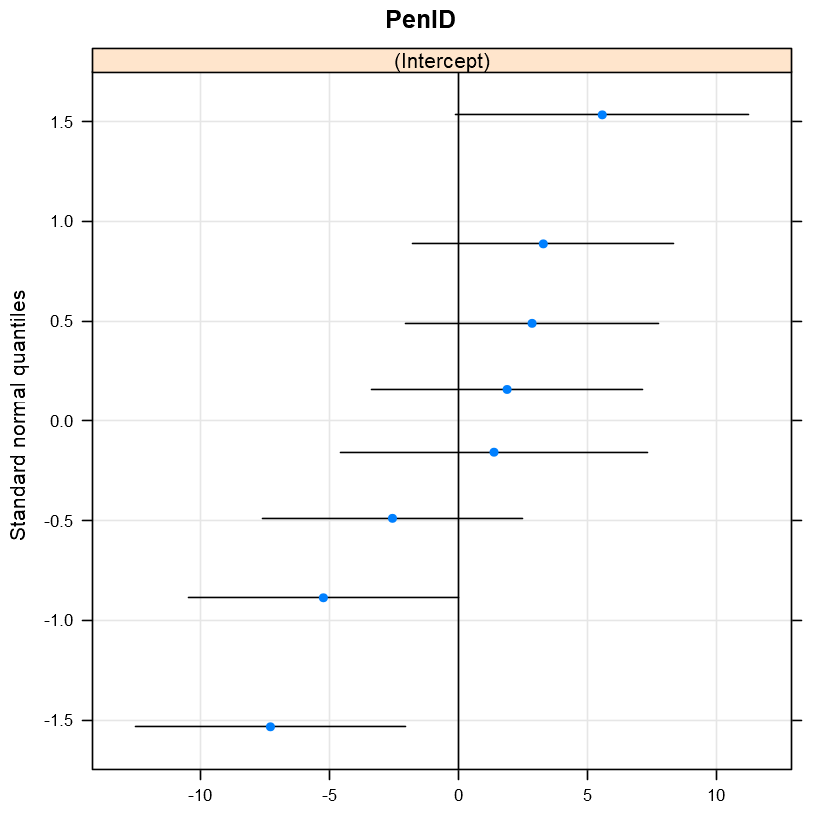

Warning message in min(new_value, na.rm = T):
"aucun argument trouvé pour min ; Inf est renvoyé"
Warning message in min(dat$conf.low):
"aucun argument trouvé pour min ; Inf est renvoyé"
Warning message in min(dat$estimate):
"aucun argument trouvé pour min ; Inf est renvoyé"
Warning message in max(dat$conf.high):
"aucun argument pour max ; -Inf est renvoyé"
Warning message in max(dat$estimate):
"aucun argument pour max ; -Inf est renvoyé"
Warning message in min(ticks):
"aucun argument trouvé pour min ; Inf est renvoyé"
Warning message in max(ticks):
"aucun argument pour max ; -Inf est renvoyé"
Warning message in rep(yes, length.out = len):
"'x' is NULL so the result will be NULL"
ERROR while rich displaying an object: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: l'argument de remplacement est de longueur nulle

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in r

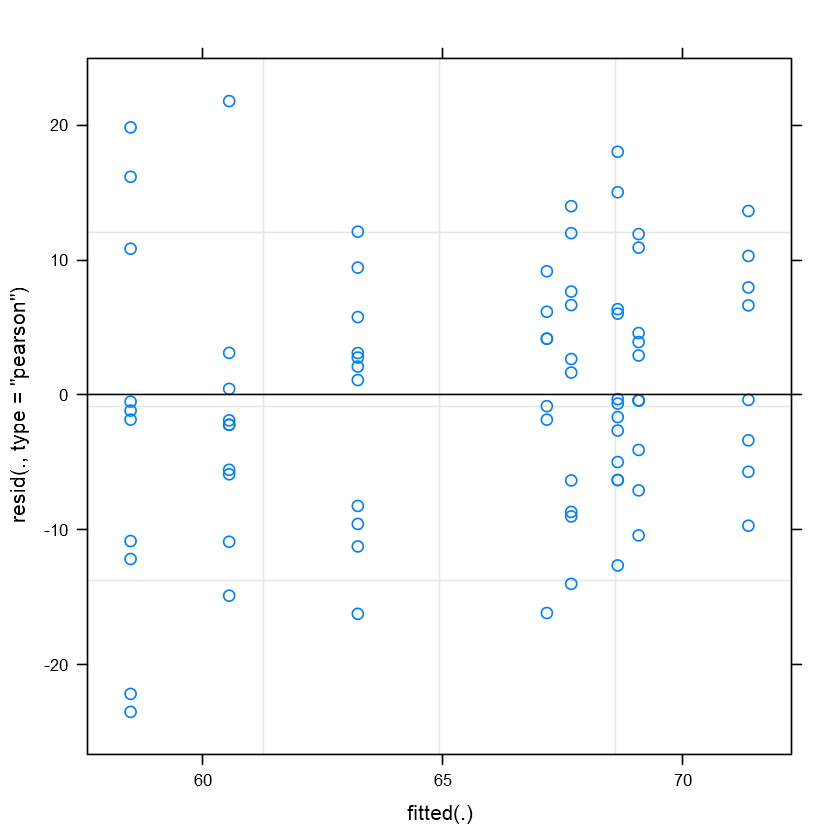

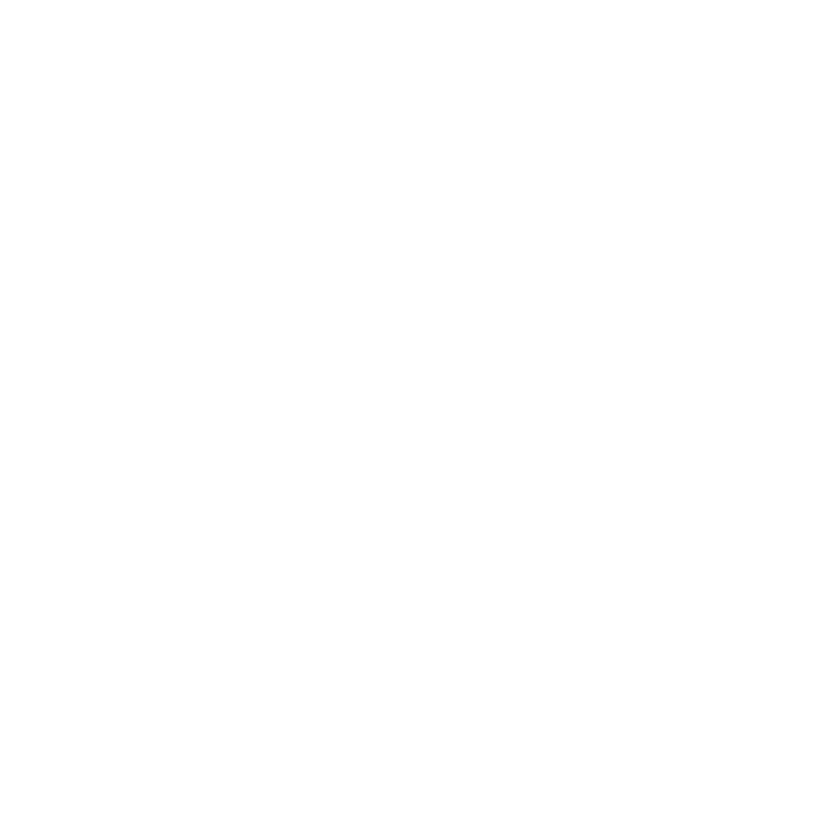

In [4]:
#FOR model PLOT in poster
#only two groups so treatment as fixed effect (otherwise (1|Treatment/PenID) lead to boundary (singular) fit: see ?isSingular)
fit_ = lmerTest::lmer(Feathers ~ Person_feather + RPen + CLASS + Treatment + InitWeight + (1|PenID), 
           data=df)
# Backward elimination using terms with default alpha-levels:
step_res = step(fit_)
#show elimination results
step_res
fit = get_model(step_res)
fit_feather = fit

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

# Pododermatitis

#PBmodcomp from pbkrtest
fit1 = glmer(Pododermatitis_bin ~  nbr_days_4zonevisited + nbr_obs_perc_duration_5_Zone+(1|PenID), data=df, family=binomial)
fit2 = glmer(Pododermatitis_bin ~  nbr_days_4zonevisited + (1|PenID), data=df, family=binomial)
PBmodcomp(fit1,fit2)

#only two groups so treatment as fixed effect (otherwise (1|Treatment/PenID) lead to boundary (singular) fit: see ?isSingular)
#fit_ = glmer(Pododermatitis ~ Person_toe + nbr_obs_perc_duration_5_Zone +nbr_days_4zonevisited + nbr_days_nomvt + Treatment + mean_perc_duration_5_Zone + mean_perc_duration_3_Zone + mean_perc_duration_2_Zone + mean_percentage_time_outside_while_WG_open + mean_vertical_travel_distance_perh + (1|PenID), data=df, family=poisson)
fit_ = glmer(Pododermatitis_bin ~  nbr_days_4zonevisited + (1|PenID), data=df, family=binomial)
summary(fit_)
simulationOutput = simulateResiduals(fittedModel = fit_, plot = F)
plot(simulationOutput)

#Poisson: not working
#only two groups so treatment as fixed effect (otherwise (1|Treatment/PenID) lead to boundary (singular) fit: see ?isSingular)
#fit_ = glmer(Pododermatitis ~ Person_toe + nbr_obs_perc_duration_5_Zone +nbr_days_4zonevisited + nbr_days_nomvt + Treatment + mean_perc_duration_5_Zone + mean_perc_duration_3_Zone + mean_perc_duration_2_Zone + mean_percentage_time_outside_while_WG_open + mean_vertical_travel_distance_perh + (1|PenID), data=df, family=poisson)
fit_ = glmer(Pododermatitis ~ mean_perc_duration_3_Zone + mean_percentage_time_outside_while_WG_open + mean_vertical_travel_distance_perh + (1|PenID), 
           data=df, family=poisson)
summary(fit_)
simulationOutput = simulateResiduals(fittedModel = fit_, plot = F)
plot(simulationOutput)

## Feather HA5

Backward reduced random-effect table:

            Eliminated npar  logLik    AIC    LRT Df Pr(>Chisq)  
<none>                   12 -287.08 598.17                       
(1 | PenID)          0   11 -290.05 602.10 5.9258  1    0.01492 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Backward reduced fixed-effect table:
Degrees of freedom method: Satterthwaite 

                                   Eliminated Sum Sq Mean Sq NumDF  DenDF
nbr_days_4zonevisited                       1   0.03    0.03     1 68.387
mean_perc_duration_5_Zone                   2   0.25    0.25     1 67.378
nbr_days_nomvt                              3   8.49    8.49     1 68.059
mean_perc_duration_2_Zone                   4   8.13    8.13     1 69.637
mean_vertical_travel_distance_perh          5   8.64    8.64     1 70.286
nbr_obs                                     6  40.44   40.44     1  6.218
Person_feather                              7 111.05  111.05     1 69.575
mean_perc_duration_3_Zo

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
mean_perc_1_Zone_while_WG_open,717.6836,717.6836,1,73.30735,8.148529,0.005600398


(Intercept) mean_perc_1_Zone_while_WG_open 
                    62.8954296                      0.4305543

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Feathers ~ mean_perc_1_Zone_while_WG_open + (1 | PenID)
   Data: df

REML criterion at convergence: 585.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.43762 -0.78370  0.03869  0.64140  2.08286 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept) 26.11    5.110   
 Residual             88.08    9.385   
Number of obs: 79, groups:  PenID, 8

Fixed effects:
                               Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)                     62.8954     2.3278 10.2565  27.019 7.21e-11 ***
mean_perc_1_Zone_while_WG_open   0.4306     0.1508 73.3073   2.855   0.0056 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
m__1_Z__WG_ -0.433

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


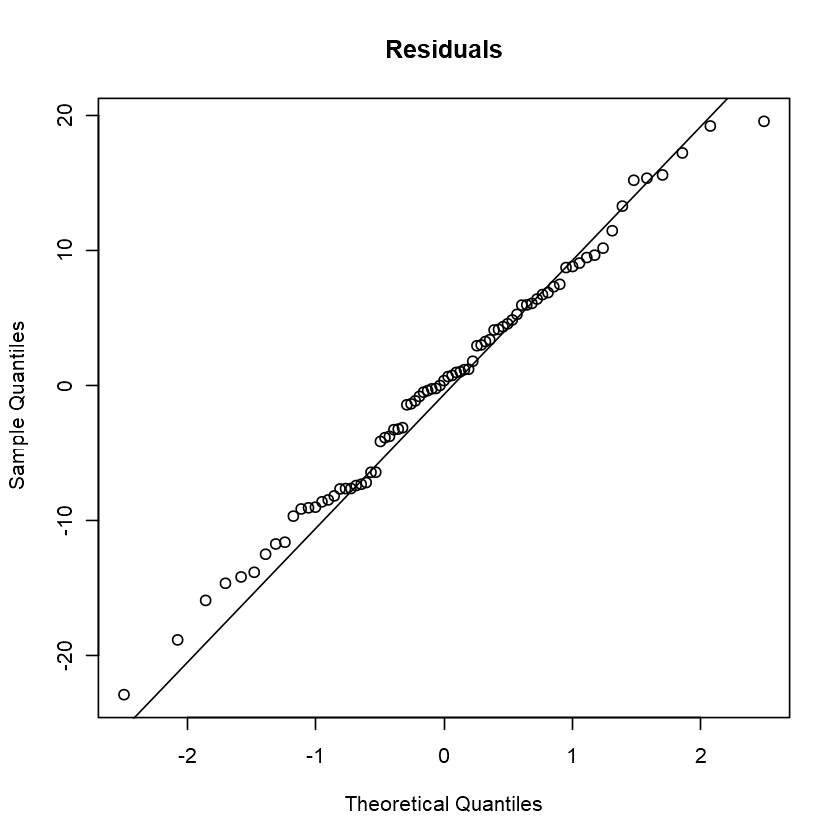

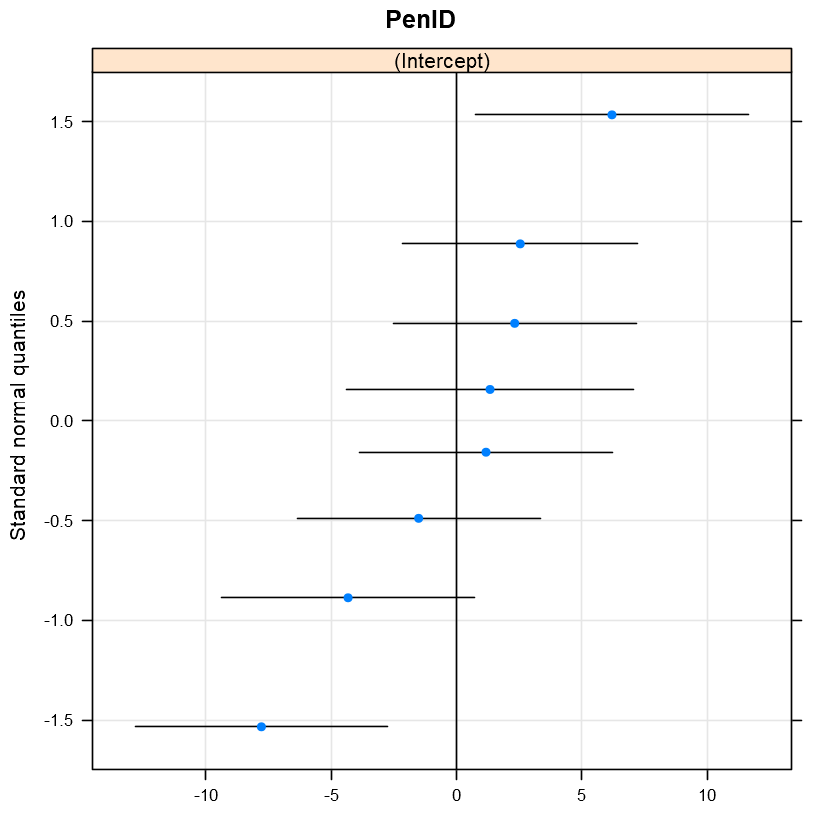

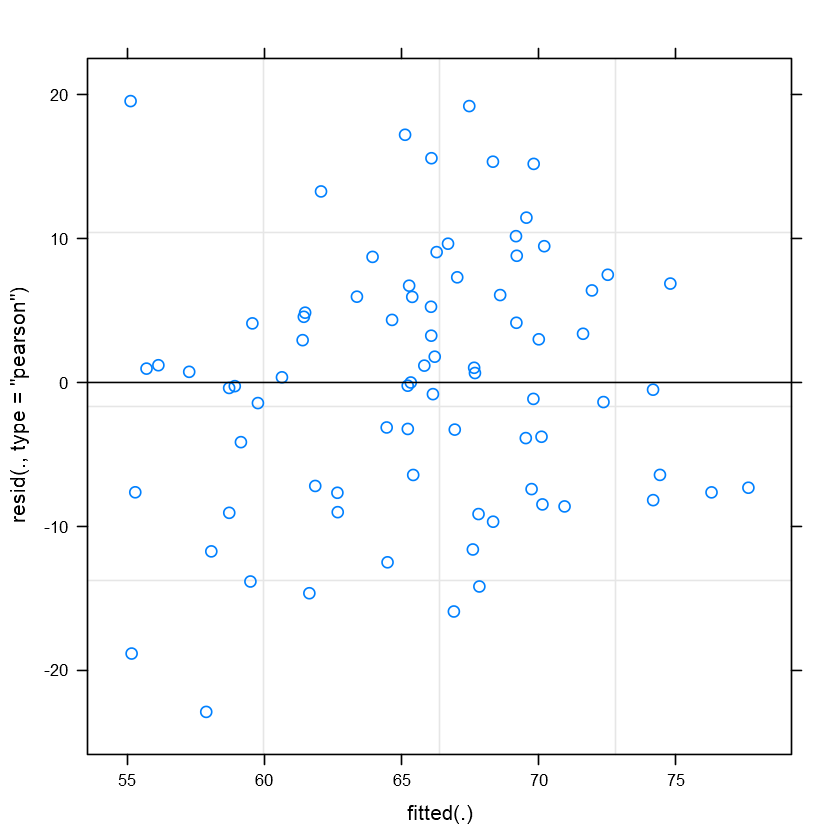

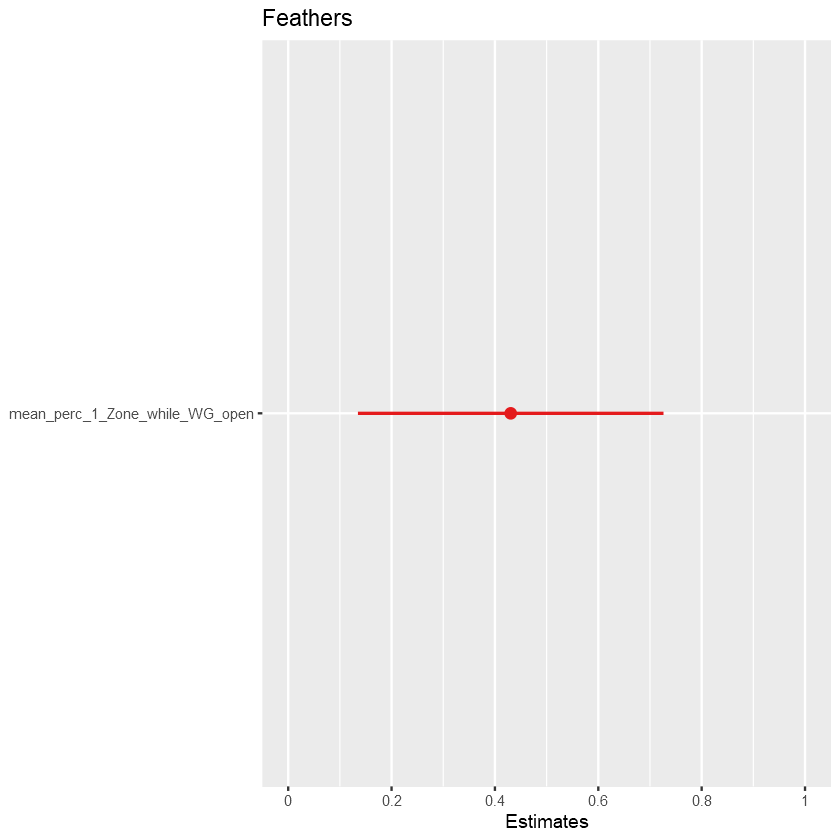

In [5]:
#For model PLOT in poster
#only two groups so treatment as fixed effect (otherwise (1|Treatment/PenID) lead to boundary (singular) fit: see ?isSingular)
#for predictive plot in poster
fit_ = lmerTest::lmer(Feathers ~ Person_feather + nbr_obs + nbr_days_4zonevisited + nbr_days_nomvt + mean_perc_duration_5_Zone + mean_perc_duration_3_Zone + mean_perc_duration_2_Zone + mean_perc_1_Zone_while_WG_open + mean_vertical_travel_distance_perh + (1|PenID), 
           data=df)
#Backward elimination using terms with default alpha-levels:
step_res = step(fit_)
#show elimination results
step_res
fit = get_model(step_res)
fit_feather = fit
anova(fit)
effCoef(fit)

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

In [6]:
tab_model(fit, file=file.path(path_,'LMERFeather.html'))
# then take this html file and make .png file
webshot(file.path(path_,'LMERFeather.html'), file.path(path_,'LMERFeather.png'), zoom=3, cliprect = c(0, 5, 600, 270))

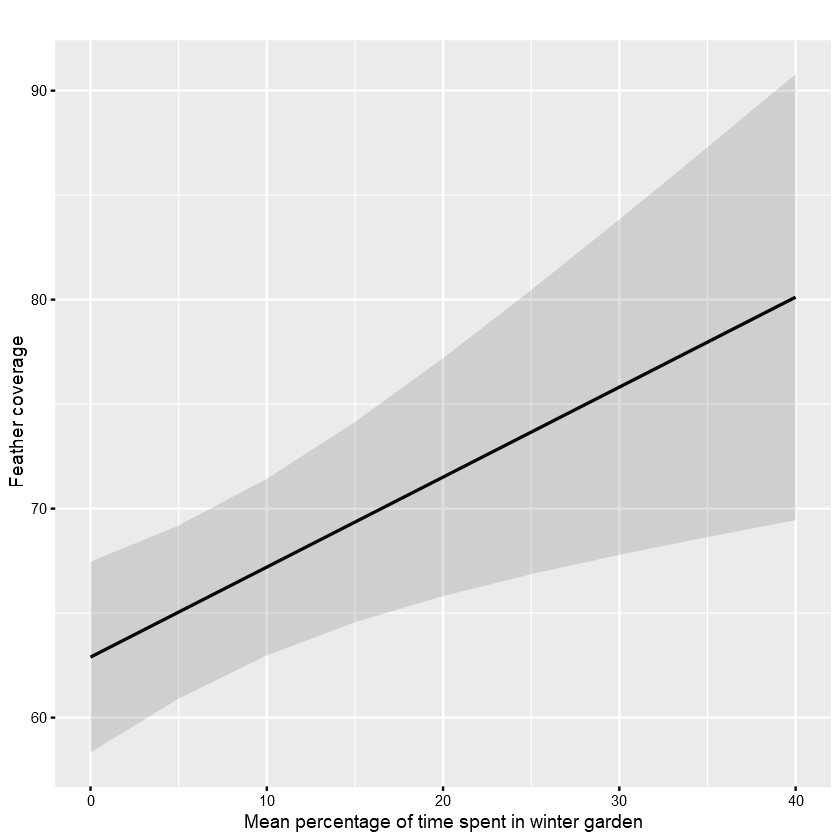

In [7]:
sjPlot::plot_model(fit, type = "pred", terms = c("mean_perc_1_Zone_while_WG_open"), title='')+ xlab("Mean percentage of time spent in winter garden")+ylab('Feather coverage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Feather_WG_pred.png'), width=4, height=4, bg = "transparent")

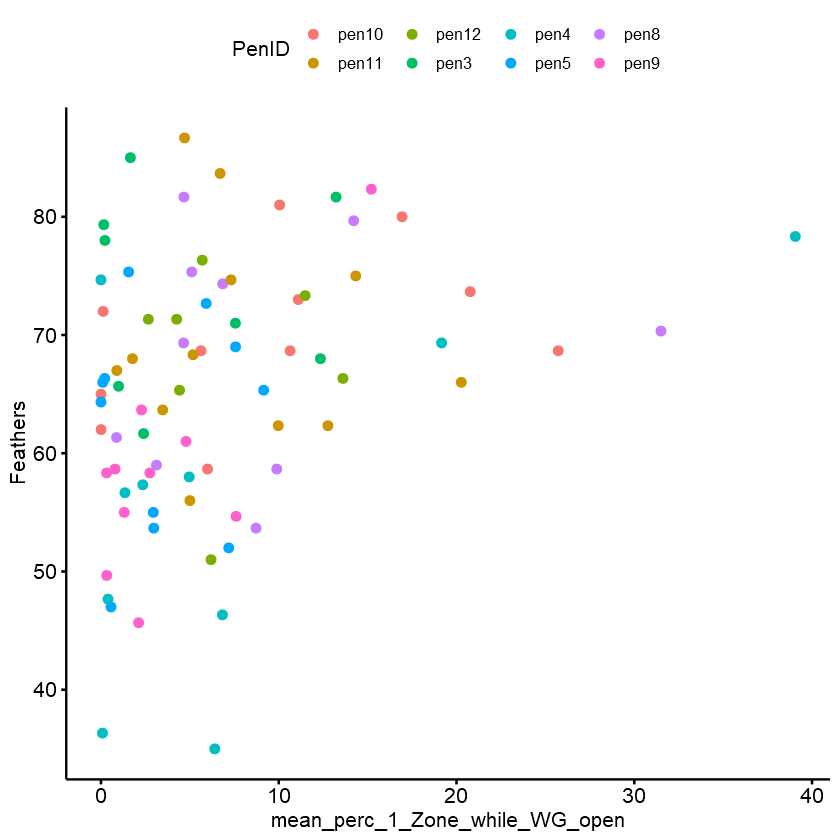

In [8]:
ggscatter(df, x = "mean_perc_1_Zone_while_WG_open", y = "Feathers",color = "PenID")
ggsave(file.path(path_,'Feather_WG_scatter.png'),width=5, height=5)

p1 = sjPlot::plot_model(fit, type = "pred", terms = c("mean_perc_duration_3_Zone"), title='')+xlab("Mean percentage of time spent in Lower perch")+ylab('Feather coverage')+ylab('Feather coverage') +
      theme(plot.background = element_rect(fill = "transparent",colour = NA), 
            axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))+ ylim(75, 100)

p2 = sjPlot::plot_model(fit, type = "pred", terms = c("nbr_days_4zonevisited"), title='')+ xlab("Number of the first 3 days with 4 zone visited")+ylab('Feather coverage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
            axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))+ ylim(75, 100)

p3 = sjPlot::plot_model(fit, type = "pred", terms = c("mean_percentage_time_outside_while_WG_open"), title='')+ xlab("Mean percentage of time spent in winter garden")+ylab('Feather coverage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))+ ylim(75, 100)

p = plot_grid(p3,p2,p1, ncol=3, nrow=1)
title = ggdraw() + draw_label("Predicted Value of Feather Coverage (higher values indicate more feathers present) from LMER", fontface='bold')
plot_grid(title, p, ncol=1, rel_heights=c(0.1, 1)) # rel_heights values control title margins

ggsave(file.path(path_adapt,'PRED_Feather_ALL.png'),width=12, height=4, bg = "transparent")

## Severity HA5

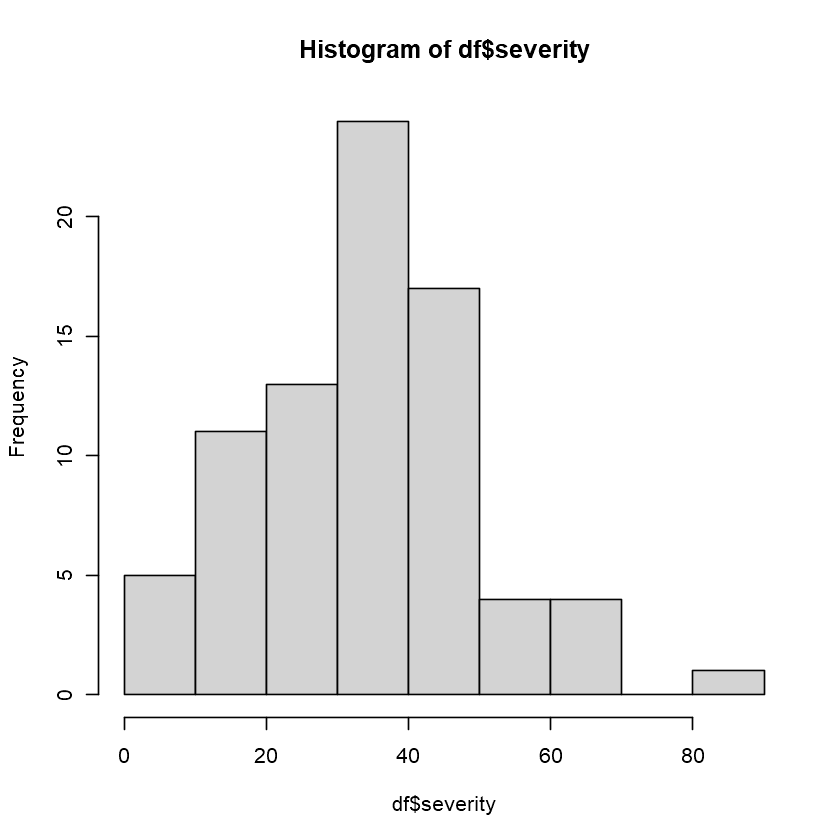

In [9]:
hist(df$severity)

Backward reduced random-effect table:

            Eliminated npar  logLik    AIC     LRT Df Pr(>Chisq)
<none>                   11 -318.78 659.55                      
(1 | PenID)          1   10 -319.05 658.10 0.54881  1     0.4588

Backward reduced fixed-effect table:
                                   Eliminated Df Sum of Sq   RSS    AIC F value
mean_perc_1_Zone_while_WG_open              1  1      4.43 17088 440.76  0.0181
nbr_obs                                     2  1     28.18 17116 438.89  0.1171
mean_vertical_travel_distance_perh          3  1    154.99 17271 437.60  0.6520
nbr_days_4zonevisited                       4  1    117.64 17389 436.14  0.4972
mean_perc_duration_3_Zone                   5  1    346.94 17736 435.70  1.4764
mean_perc_duration_5_Zone                   6  1     89.56 17825 434.09  0.3787
mean_perc_duration_2_Zone                   7  1     33.88 17859 432.24  0.1444
nbr_days_nomvt                              0  1    972.23 18831 434.43  4.1918
        

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
nbr_days_nomvt,1,972.2266,972.2266,4.191814,0.04403049
Residuals,77,17858.9633,231.9346,NA,NA


(Intercept) nbr_days_nomvt 
     33.719298       3.913078


Call:
lm(formula = severity ~ nbr_days_nomvt, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.632 -11.719   0.281  10.281  46.368 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      33.719      2.017  16.716   <2e-16 ***
nbr_days_nomvt    3.913      1.911   2.047    0.044 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.23 on 77 degrees of freedom
Multiple R-squared:  0.05163,	Adjusted R-squared:  0.03931 
F-statistic: 4.192 on 1 and 77 DF,  p-value: 0.04403


ERROR: Error in UseMethod("ranef"): pas de méthode pour 'ranef' applicable pour un objet de classe "lm"


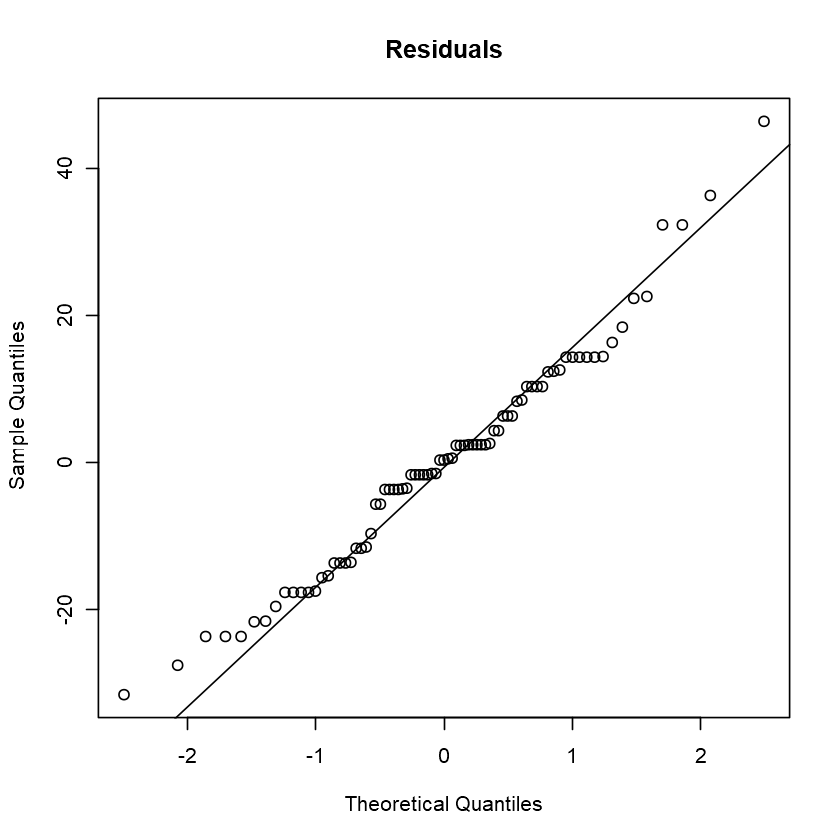

In [10]:
#only two groups so treatment as fixed effect (otherwise (1|Treatment/PenID) lead to boundary (singular) fit: see ?isSingular)
fit_ = lmerTest::lmer(severity ~ nbr_obs + nbr_days_4zonevisited + nbr_days_nomvt + mean_perc_duration_5_Zone + mean_perc_duration_3_Zone + mean_perc_duration_2_Zone + mean_perc_1_Zone_while_WG_open + mean_vertical_travel_distance_perh + (1|PenID), 
           data=df)
# Backward elimination using terms with default alpha-levels:
step_res = step(fit_)
#show elimination results
step_res
fit = get_model(step_res)
fit_feather = fit
anova(fit)
effCoef(fit)

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

In [11]:
tab_model(fit, file=file.path(path_,'LMERSEVERITY.html'))
# then take this html file and make .png file
webshot(file.path(path_,'LMERSEVERITY.html'), file.path(path_,'LMERSEVERITY.png'), zoom=3, cliprect = c(0, 5, 600, 270))

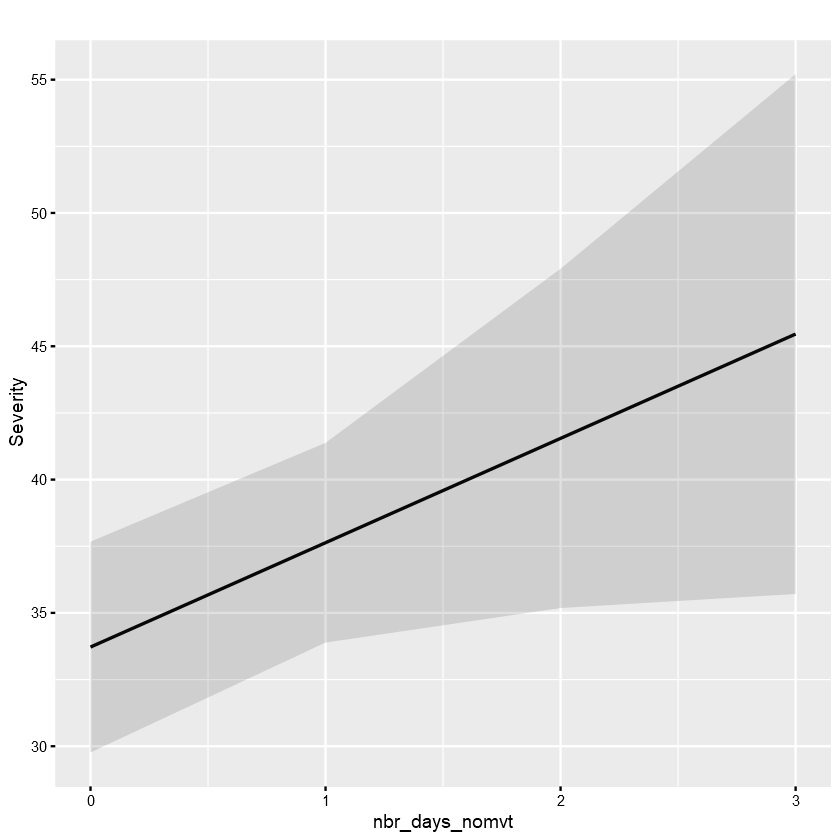

In [12]:
sjPlot::plot_model(fit, type = "pred", terms = c("nbr_days_nomvt"), title='')+ xlab("nbr_days_nomvt")+ylab('Severity')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Severity_nbr_days_nomvt_pred.png'), width=4, height=4, bg = "transparent")

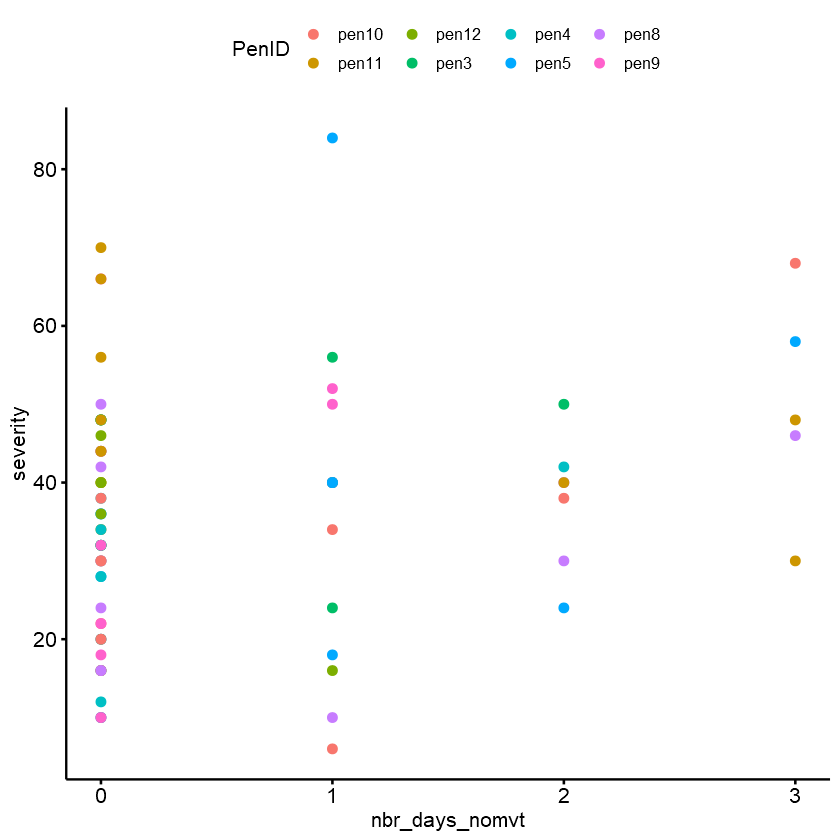

In [13]:
ggscatter(df, x = "nbr_days_nomvt", y = "severity",color = "PenID")
ggsave(file.path(path_,'Severity_nbr_days_nomvt_scatter.png'),width=5, height=5)

# Weight

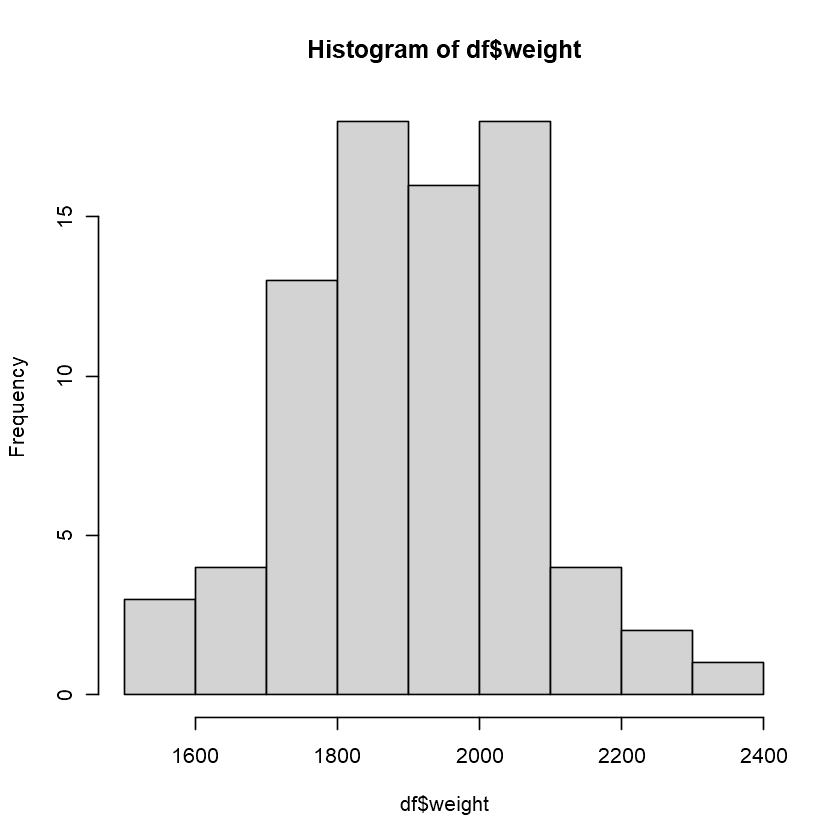

In [14]:
hist(df$weight)

Backward reduced random-effect table:

            Eliminated npar  logLik    AIC      LRT Df Pr(>Chisq)
<none>                   11 -479.84 981.68                       
(1 | PenID)          1   10 -479.87 979.73 0.052209  1     0.8193

Backward reduced fixed-effect table:
                                   Eliminated Df Sum of Sq     RSS    AIC
mean_perc_duration_3_Zone                   1  1       102 1690744 803.73
mean_perc_duration_5_Zone                   2  1      1673 1692417 801.81
mean_perc_duration_2_Zone                   3  1     17958 1710375 800.64
nbr_obs                                     4  1     17686 1728061 799.45
nbr_days_4zonevisited                       5  1     26753 1754814 798.67
mean_perc_1_Zone_while_WG_open              6  1     75391 1830205 799.99
nbr_days_nomvt                              0  1     99258 1929463 802.16
mean_vertical_travel_distance_perh          0  1    177685 2007891 805.31
                                   F value   Pr(>F)   
mean

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
nbr_days_nomvt,1,23906.4,23906.40,0.9927228,0.322239575
mean_vertical_travel_distance_perh,1,177685.5,177685.49,7.3784609,0.008168796
Residuals,76,1830205.2,24081.65,NA,NA


(Intercept)                     nbr_days_nomvt 
                        2085.16016                          -43.42274 
mean_vertical_travel_distance_perh 
                         -44.68570


Call:
lm(formula = weight ~ nbr_days_nomvt + mean_vertical_travel_distance_perh, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-405.03 -105.74   -4.65   99.74  308.51 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         2085.16      63.21  32.990  < 2e-16 ***
nbr_days_nomvt                       -43.42      21.39  -2.030  0.04584 *  
mean_vertical_travel_distance_perh   -44.69      16.45  -2.716  0.00817 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 155.2 on 76 degrees of freedom
Multiple R-squared:  0.09922,	Adjusted R-squared:  0.07551 
F-statistic: 4.186 on 2 and 76 DF,  p-value: 0.01886


ERROR: Error in UseMethod("ranef"): pas de méthode pour 'ranef' applicable pour un objet de classe "lm"


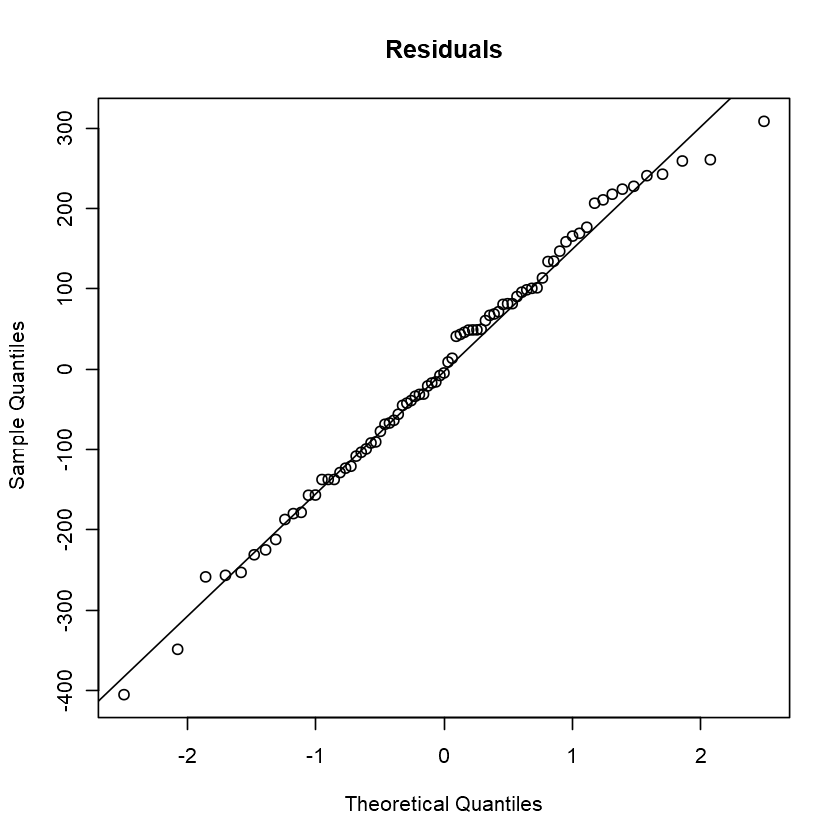

In [15]:
#only two groups so treatment as fixed effect (otherwise (1|Treatment/PenID) lead to boundary (singular) fit: see ?isSingular)
fit_ = lmerTest::lmer(weight ~ nbr_obs + nbr_days_4zonevisited + nbr_days_nomvt + mean_perc_duration_5_Zone + mean_perc_duration_3_Zone + mean_perc_duration_2_Zone + mean_perc_1_Zone_while_WG_open + mean_vertical_travel_distance_perh + (1|PenID), 
           data=df)
# Backward elimination using terms with default alpha-levels:
step_res = step(fit_)
#show elimination results
step_res
fit = get_model(step_res)
fit_feather = fit
anova(fit)
effCoef(fit)

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

In [16]:
tab_model(fit, file=file.path(path_,'LMERWEIGHT.html'))
# then take this html file and make .png file
webshot(file.path(path_,'LMERWEIGHT.html'), file.path(path_,'LMERWEIGHT.png'), zoom=3, cliprect = c(0, 5, 600, 270))

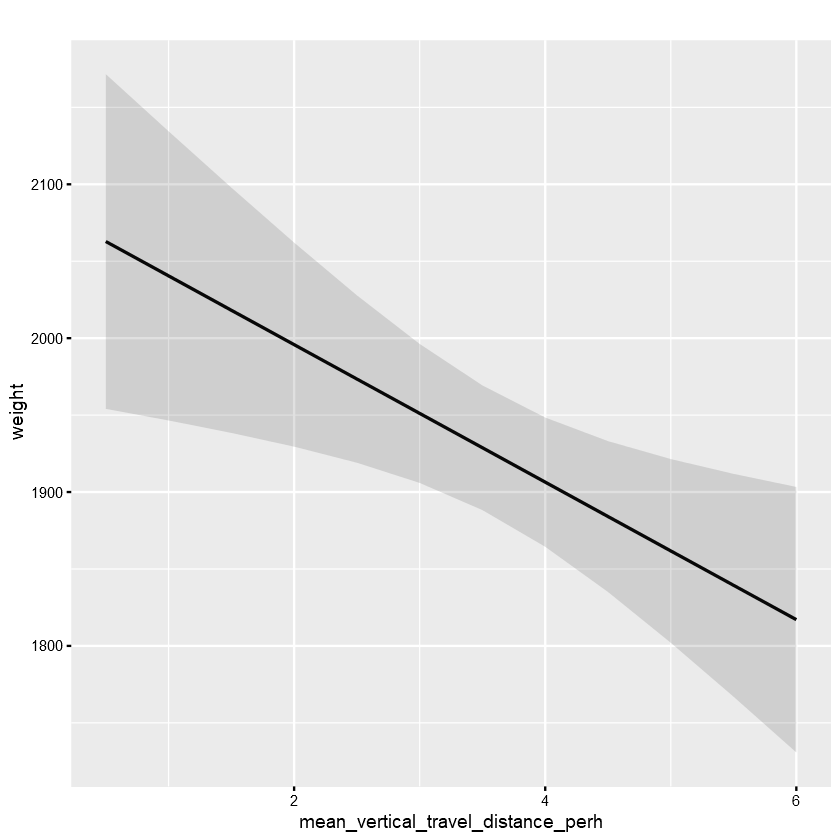

In [17]:
sjPlot::plot_model(fit, type = "pred", terms = c("mean_vertical_travel_distance_perh"), title='')+ #xlab("Mean percentage of time spent in winter garden")+ylab('Feather coverage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Weight_mean_vertical_travel_distance_perh_pred.png'), width=4, height=4, bg = "transparent")

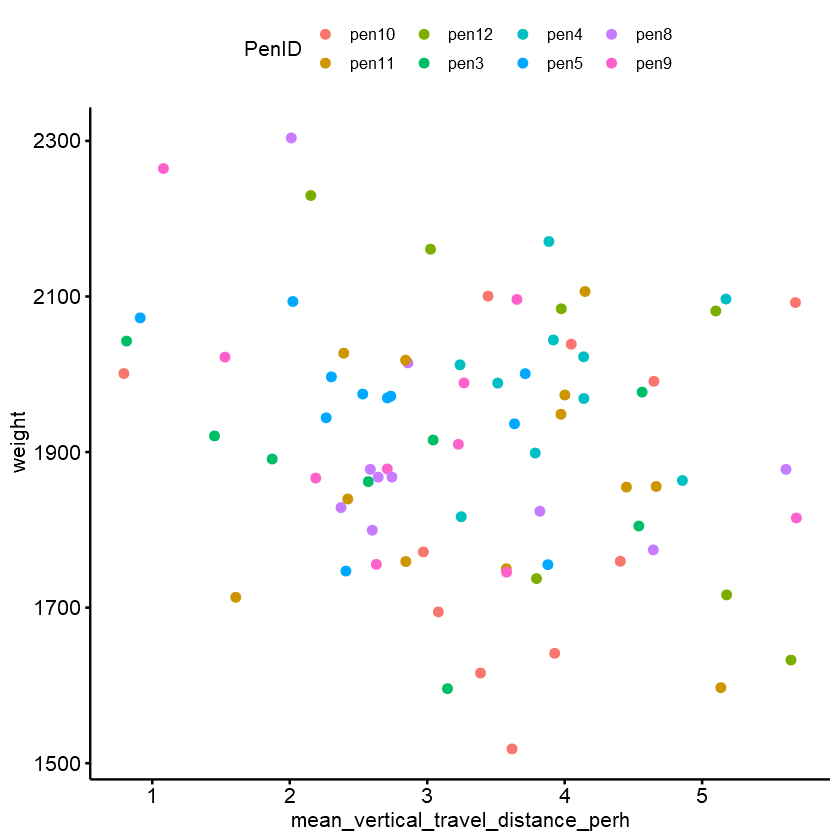

In [18]:
ggscatter(df, x = "mean_vertical_travel_distance_perh", y = "weight",color = "PenID")
ggsave(file.path(path_,'Weight_mean_vertical_travel_distance_perh.png'),width=5, height=5)

# max pododermatitis within HA1-HA5

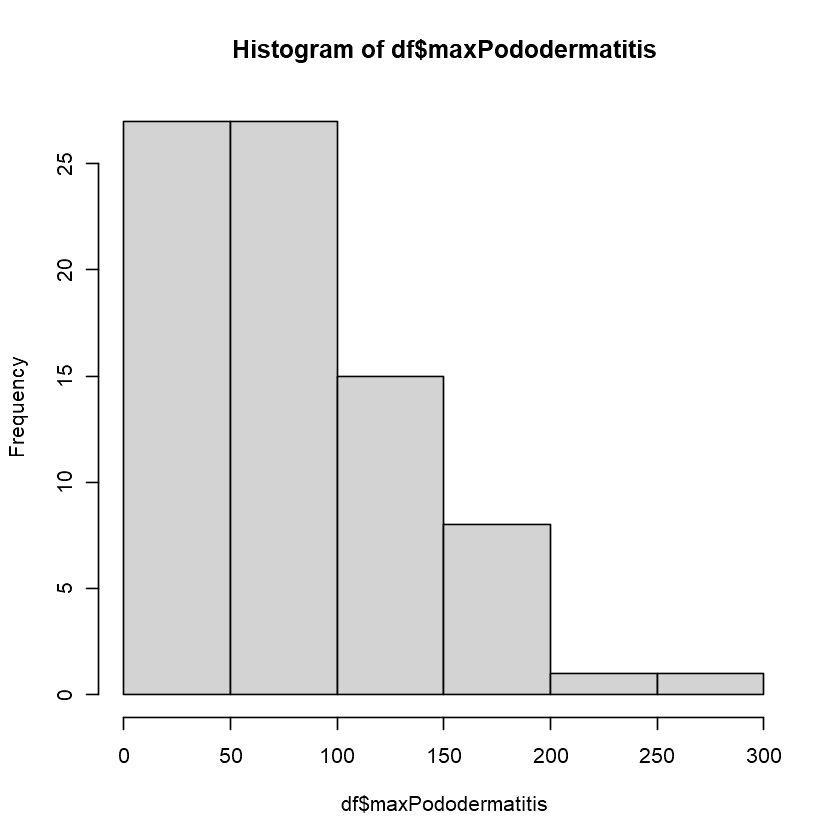

In [19]:
hist(df$maxPododermatitis)

Backward reduced random-effect table:

            Eliminated npar  logLik    AIC     LRT Df Pr(>Chisq)
<none>                   11 -414.53 851.06                      
(1 | PenID)          1   10 -414.73 849.46 0.39969  1     0.5273

Backward reduced fixed-effect table:
                                   Eliminated Df Sum of Sq    RSS    AIC
nbr_days_nomvt                              1  1     118.2 263027 656.73
nbr_days_4zonevisited                       2  1      57.6 263085 654.75
mean_perc_1_Zone_while_WG_open              3  1      92.5 263177 652.78
mean_perc_duration_2_Zone                   4  1     734.9 263912 651.00
nbr_obs                                     5  1     758.6 264671 649.23
mean_perc_duration_3_Zone                   6  1     784.9 265456 647.46
mean_vertical_travel_distance_perh          7  1    2596.0 268052 646.23
mean_perc_duration_5_Zone                   0  1   18671.7 286724 649.55
                                   F value  Pr(>F)  
nbr_days_nomvt    

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
mean_perc_duration_5_Zone,1,18671.69,18671.688,5.363589,0.02322417
Residuals,77,268051.83,3481.193,NA,NA


(Intercept) mean_perc_duration_5_Zone 
               60.9181119                 0.7771557


Call:
lm(formula = maxPododermatitis ~ mean_perc_duration_5_Zone, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-104.325  -39.516   -6.675   28.295  168.479 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                60.9181    15.4301   3.948 0.000173 ***
mean_perc_duration_5_Zone   0.7772     0.3356   2.316 0.023224 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 59 on 77 degrees of freedom
Multiple R-squared:  0.06512,	Adjusted R-squared:  0.05298 
F-statistic: 5.364 on 1 and 77 DF,  p-value: 0.02322


ERROR: Error in UseMethod("ranef"): pas de méthode pour 'ranef' applicable pour un objet de classe "lm"


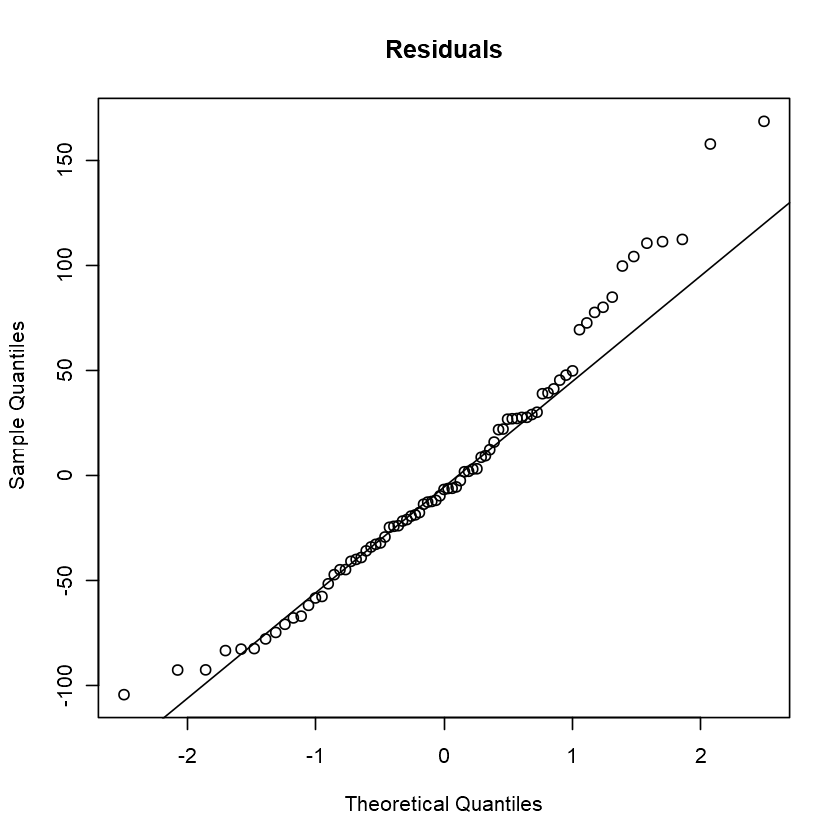

In [20]:
#only two groups so treatment as fixed effect (otherwise (1|Treatment/PenID) lead to boundary (singular) fit: see ?isSingular)
fit_ = lmerTest::lmer(maxPododermatitis ~ nbr_obs + nbr_days_4zonevisited + nbr_days_nomvt + mean_perc_duration_5_Zone + mean_perc_duration_3_Zone + mean_perc_duration_2_Zone + mean_perc_1_Zone_while_WG_open + mean_vertical_travel_distance_perh + (1|PenID), 
           data=df)
# Backward elimination using terms with default alpha-levels:
step_res = step(fit_)
#show elimination results
step_res
fit = get_model(step_res)
fit_feather = fit
anova(fit)
effCoef(fit)

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

In [21]:
tab_model(fit, file=file.path(path_,'LMERPodo.html'))
# then take this html file and make .png file
webshot(file.path(path_,'LMERPodo.html'), file.path(path_,'LMERPodo.png'), zoom=3, cliprect = c(0, 5, 600, 270))

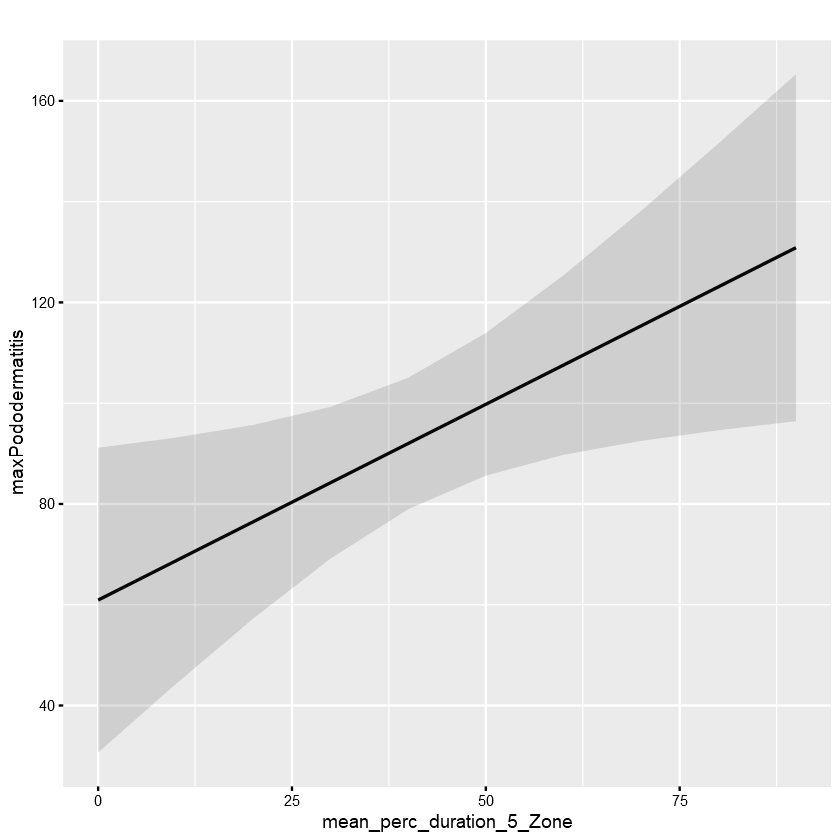

In [22]:
sjPlot::plot_model(fit, type = "pred", terms = c("mean_perc_duration_5_Zone"), title='')+ #xlab("Mean percentage of time spent in winter garden")+ylab('Feather coverage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Podo_mean_perc_duration_5_Zone.png'), width=4, height=4, bg = "transparent")

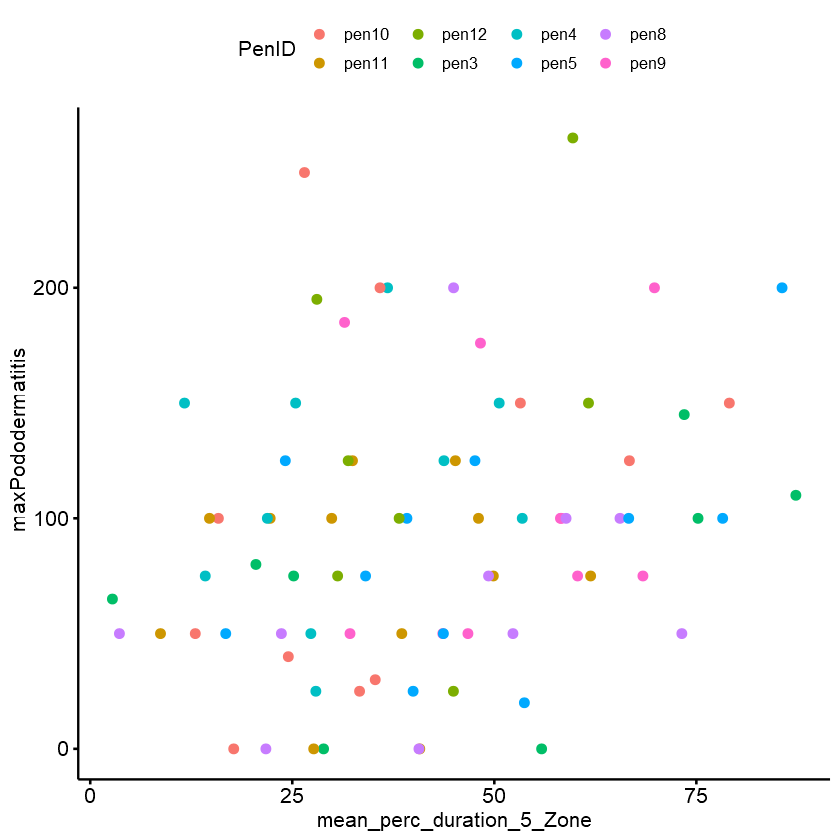

In [23]:
ggscatter(df, x = "mean_perc_duration_5_Zone", y = "maxPododermatitis",color = "PenID")
ggsave(file.path(path_,'Podo_mean_perc_duration_5_Zone.png'),width=5, height=5)